In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

# Dataset paths
base_dir = "dataset"


In [2]:
# Parameters
img_size = (224, 224)
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # Split dataset into 80% training and 20% validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)
ImageFile.LOAD_TRUNCATED_IMAGES = True

Found 1209 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


In [4]:
# Get class weights to address class imbalance
classes = list(train_generator.class_indices.keys())
y_train = train_generator.classes
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

print(f"Class Weights: {class_weights}")

Class Weights: {0: np.float64(3.053030303030303), 1: np.float64(0.6964285714285714), 2: np.float64(1.2489669421487604), 3: np.float64(0.6964285714285714)}


In [5]:
# Build the model (using Transfer Learning)
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation="softmax")
])

In [6]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights
)

C:\Users\Imran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 8/38 ━━━━━━━━━━━━━━━━━━━━ 1:02 2s/step - accuracy: 0.2507 - loss: 1.6871

C:\Users\Imran\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.3571 - loss: 1.4365 - val_accuracy: 0.3933 - val_loss: 1.1533
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.4635 - loss: 1.1325 - val_accuracy: 0.4867 - val_loss: 1.0344
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5083 - loss: 1.1121 - val_accuracy: 0.5167 - val_loss: 0.9634
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5698 - loss: 1.0406 - val_accuracy: 0.5000 - val_loss: 0.9618
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5536 - loss: 1.0302 - val_accuracy: 0.6700 - val_loss: 0.9160
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5903 - loss: 0.9903 - val_accuracy: 0.6400 - val_loss: 0.9095
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6007 - loss: 0.9928 - val_accuracy: 0.7133 - val_loss: 0.8975
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5799 - loss: 1.0192 - val_accuracy: 0.6667 - val_loss: 0.8960
Epo

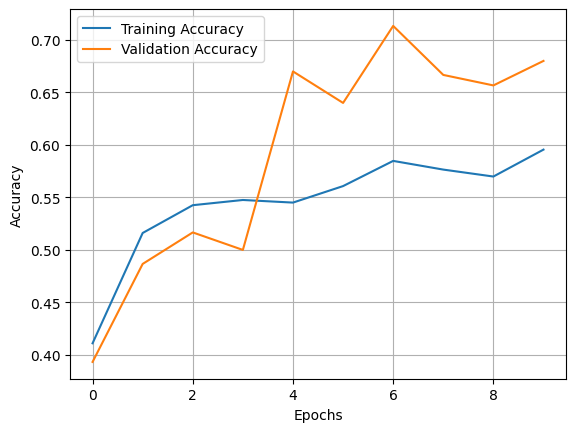

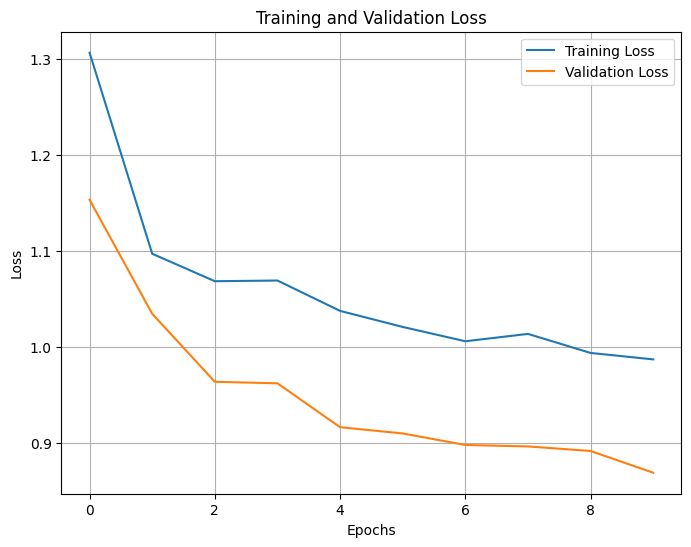

In [11]:
# Plot training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [9]:
# Save the model
model.save("vehicle_classifier_resnet50.h5")
print("Model trained and saved successfully!")

Model trained and saved successfully!
